<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

#  Simple Minimum Covariance Determinant

This code template is for Anomaly detection/outlier analysis using the Minimum Covariance Determinant(MCD) Algorithm. This template utilizes Minimum Covariance Determinant implementation from the sklearn.covariance library. The Minimum Covariance Determinant covariance estimator is to be applied to Gaussian-distributed data but could still be relevant to data drawn from a unimodal, symmetric distribution.

### Required Packages

In [ ]:
!pip install pyod
!pip install plotly

In [3]:
import time
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pyod.models.mcd import MCD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

### Initialization
Filepath of CSV file

In [ ]:
#filepath
file_path= ""

List of features which are  required for model training.

In [9]:
#x_values
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [8]:
df=pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [11]:
X=df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [12]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [14]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


###Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [16]:
x_train, x_test = train_test_split(X,test_size=0.2,random_state=123)

###Model
Minimum Covariance Determinant (MCD): robust estimator of covariance.

The Minimum Covariance Determinant covariance estimator is to be applied on Gaussian-distributed data, but could still be relevant on data drawn from a unimodal, symmetric distribution. It is not meant to be used with multi-modal data (the algorithm used to fit a MinCovDet object is likely to fail in such a case). One should consider projection pursuit methods to deal with multi-modal datasets.

First fit a minimum covariance determinant model and then compute the Mahalanobis distance as the outlier degree of the data

####Tuning parameters:
class pyod.models.mcd.MCD(contamination=0.1, store_precision=True, assume_centered=False, support_fraction=None, random_state=None)

**contamination (float in (0., 0.5), optional (default=0.1))** – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

**store_precision (bool)** – Specify if the estimated precision is stored.

**assume_centered (bool)** – If True, the support of the robust location and the covariance estimates is computed, and a covariance estimate is recomputed from it, without centering the data. Useful to work with data whose mean is significantly equal to zero but is not exactly zero. If False, the robust location and covariance are directly computed with the FastMCD algorithm without additional treatment.

**support_fraction (float, 0 < support_fraction < 1)** – The proportion of points to be included in the support of the raw MCD estimate. Default is None, which implies that the minimum value of support_fraction will be used within the algorithm: [n_sample + n_features + 1] / 2

**random_state (int, RandomState instance or None, optional (default=None))** – If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [17]:
model = MCD() 
model.fit(x_train)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

###Anomaly Prediction

In [18]:
result=x_test.copy(deep=True)
result['Anomaly']=model.predict(x_test)
result.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Anomaly
3334,2884,1.137494,0.059852,0.646707,0.870523,-0.457535,-0.399917,-0.009548,-0.074636,0.296164,-0.272382,0.007814,1.159701,0.813537,-0.202221,-0.082217,-0.711506,0.376467,-1.379354,-0.273722,-0.072150,-0.163255,-0.243348,0.058593,0.470917,0.363604,0.273553,-0.002255,0.017479,21.93,0
2455,2021,-1.847816,-1.023305,-1.114508,0.793390,3.205499,2.884988,-1.041159,1.501118,-0.405472,-1.027728,-0.314906,-0.156789,0.030318,-1.030068,0.783639,0.639303,0.775812,1.377055,0.549857,0.762600,0.265795,-0.129217,0.181105,0.882320,-0.515912,-0.406969,0.142542,-0.096309,107.26,1
4556,3880,1.265538,0.399820,0.664385,0.818366,-0.360797,-0.932581,0.000319,-0.312733,1.258327,-0.449883,0.809091,-1.885964,2.431354,1.578821,0.242385,0.252343,0.280559,-0.326130,-0.323511,-0.107542,-0.403236,-0.892036,0.142718,0.326694,0.211297,0.054754,-0.052533,0.013445,0.99,0
4883,4404,-0.408430,0.535469,1.170168,0.636090,2.184724,4.738257,-0.376270,0.985649,1.913860,-0.500293,-0.143244,-2.319651,1.196560,0.558387,-2.106475,-1.137115,1.020308,0.092372,1.831190,0.305796,-0.659992,-1.065665,-0.174249,0.939688,0.128567,-0.451060,0.240381,-0.048335,7.79,0
92,60,1.107029,0.216441,0.538378,1.476398,-0.251942,-0.340680,0.154092,-0.086503,0.144420,-0.157375,-0.107560,1.066326,0.620788,-0.070889,-0.203858,-0.853479,0.336478,-1.179532,-0.501729,-0.111853,-0.060037,0.059884,-0.047526,0.443992,0.640296,-0.337657,0.042108,0.024265,26.72,0


###Anomaly Visualization
####Bar Plot

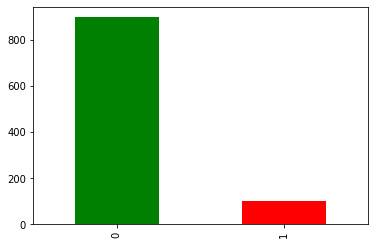

In [19]:
result['Anomaly'].value_counts().plot(kind='bar',color=['green','red'])

###Pie Chart

In [20]:
fig = px.pie(result['Anomaly'],names=result['Anomaly'], title='Anomaly rate')
fig.show()

####Anomalies
In this part we will perform Dimensionality Reduction technique to visualize data. This can be performed using technique such as PCA or TSNE algorithms.

In [21]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(result.drop('Anomaly',axis=1))

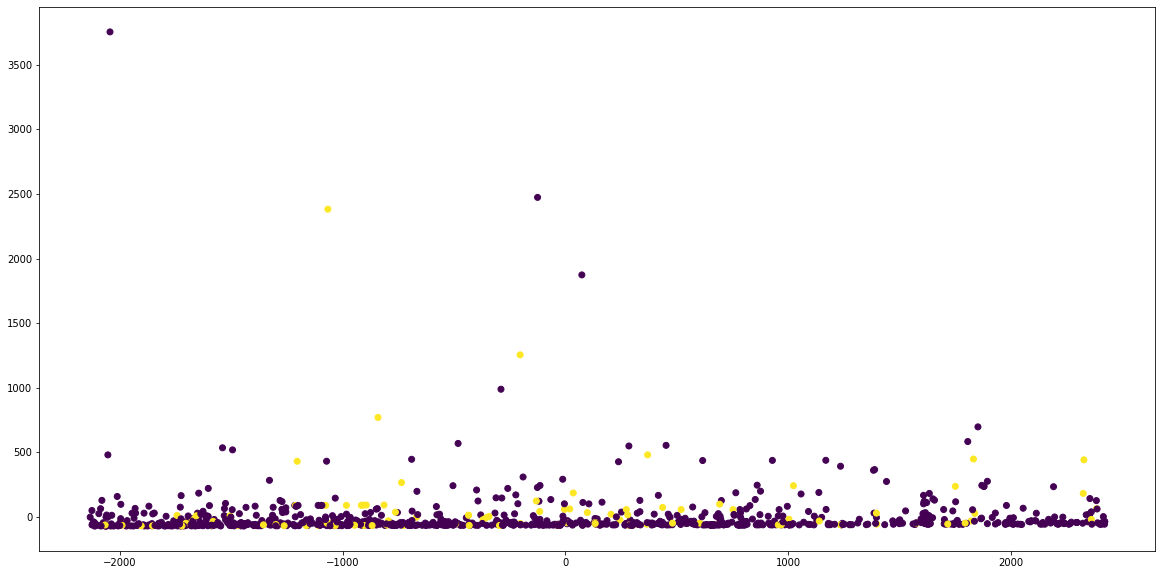

In [22]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=pca_results[:,0],y=pca_results[:,1],c=result.iloc[:,result.columns.get_loc('Anomaly')])
plt.show()

#### Creator: Ayush Gupta , Github: [Profile](https://github.com/guptayush179)